## Exploration 11

### STEP 1 : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
* ÏπºÎüº Ï¢ÖÎ•ò: Date, Open, High, Low, Close, Adj Close, Volume
* ÎÇ†ÏßúÎ≥ÑÎ°ú ÏãúÏûëÍ∞Ä(Open), ÏµúÍ≥†Í∞Ä(High), ÏµúÏ†ÄÍ∞Ä(Low), Ï¢ÖÍ∞Ä(Close), ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close), Í±∞ÎûòÎüâ(Volume)Ïù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
* Ïö∞Î¶¨Îäî Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. (Ï£ºÏãù ÏãúÏû•ÏùÄ Ï†ïÌï¥ÏßÑ ÏãúÍ∞Ñ ÎèôÏïàÎßå Í±∞ÎûòÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§. Ï¢ÖÍ∞ÄÎûÄ ÌïòÎ£®Ïùò Ïû•Ïù¥ ÎßàÍ∞êÌïòÏòÄÏùÑ ÎïåÏùò Í∞ÄÍ≤©ÏûÖÎãàÎã§.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

In [2]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('Ïäù=3')

Ïäù=3


In [3]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÑúÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('Ïäù=3')

Ïäù=3


### STEP 2 : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ
* Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
* Î°úÍ∑∏ Î≥ÄÌôò

In [4]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 

Series([], Name: Close, dtype: float64)

In [5]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

### STEP 3 : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù
* Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
* Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
* ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time Series Decomposition)
* Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

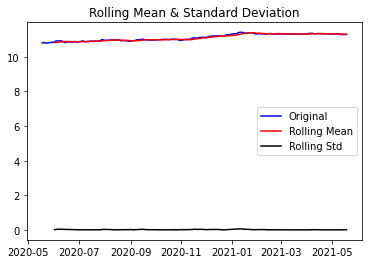

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


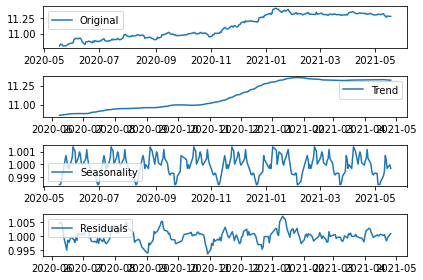

In [6]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [7]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


### STEP 4 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
* ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

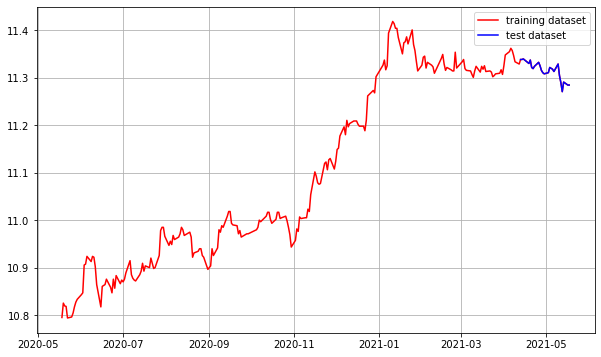

In [8]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
* ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
* Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


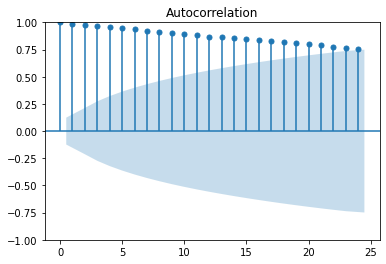

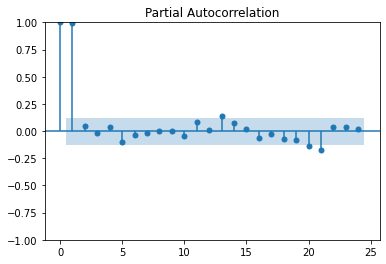

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


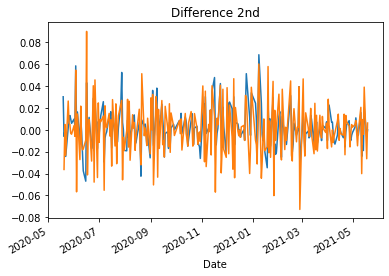

In [10]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### STEP 6 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏
* ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
* Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
* ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [11]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Thu, 17 Feb 2022   AIC                          -1156.722
Time:                        05:34:43   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


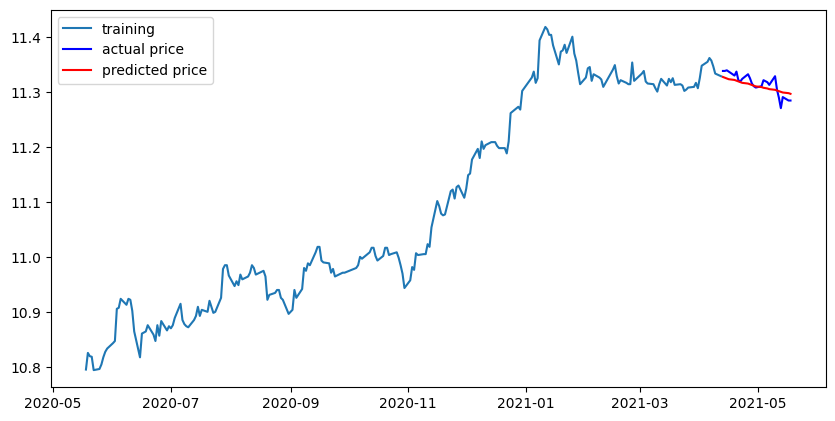

In [12]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1048973.6014239907
MAE:  843.7579531508708
RMSE:  1024.19412292006
MAPE: 1.03%


### STEP 7 : Îã§Î•∏ Ï£ºÏãù Ï¢ÖÎ™© ÏòàÏ∏°Ìï¥ Î≥¥Í∏∞
* Í¥ÄÏã¨ Ï¢ÖÎ™©ÏùÑ Í≥®Îùº ÏúÑ STEP 1~6Ïùò Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌï¥ Î≥¥Í∏∞

Ïäù=3
Ïäù=3


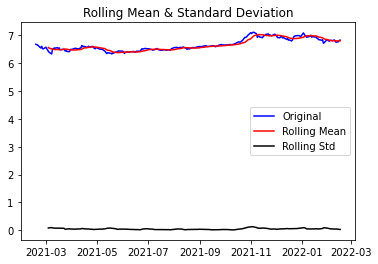

Results of Dickey-Fuller Test:
Test Statistic                  -1.253137
p-value                          0.650330
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.567501e+00
p-value                        8.089813e-09
#Lags Used                     7.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (1%)           -3.460992e+00
Critical Value (5%)           -2.875016e+00
Critical Value (10%)          -2.573952e+00
dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


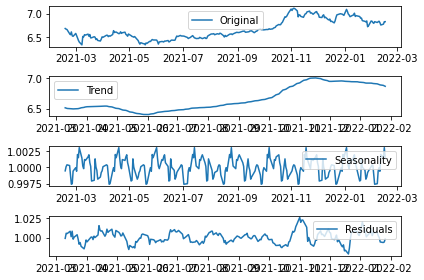

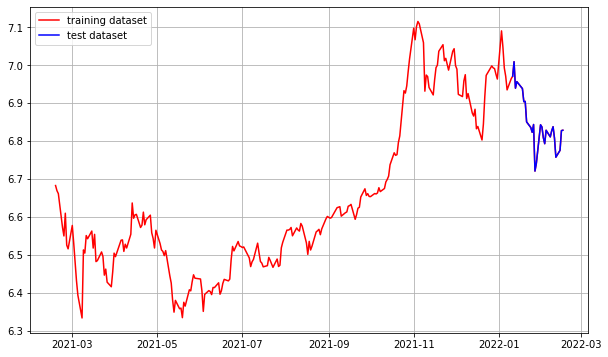

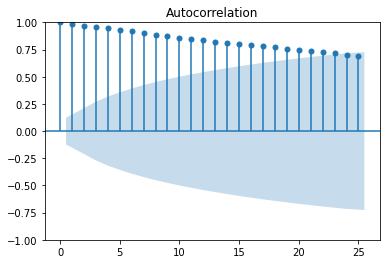

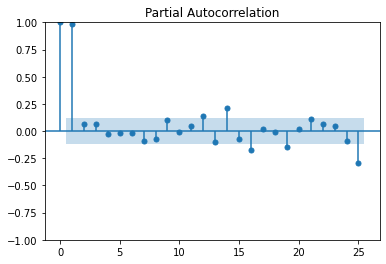

Results of Dickey-Fuller Test:
Test Statistic                -1.683248e+01
p-value                        1.155026e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.198159e+00
p-value                        2.404162e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(3, 2, 3)   Log Likelihood                 438.882
Date:                Thu, 17 Feb 2022   AIC                           -863.764
Time:                        14:31:44   BIC                           -839.820
Sample:                             0   HQIC                          -854.101
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2656      0.071     -3.758      0.000      -0.404      -0.127
ar.L2         -0.9064      0.051    -17.642      0.000      -1.007      -0.806
ar.L3          0.0089      0.072      0.124      0.9

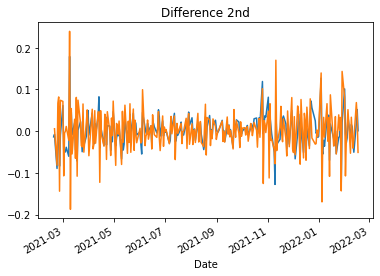

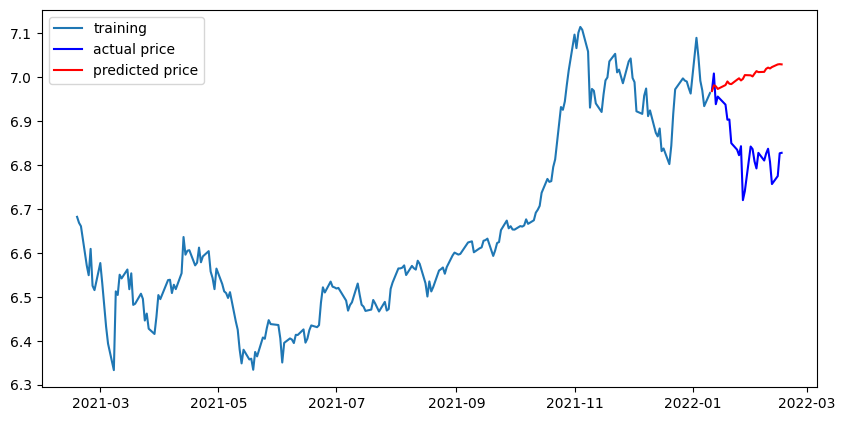

MSE:  31256.277580091213
MAE:  158.8283154022858
RMSE:  176.79445008283267
MAPE: 17.48%
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-700.784, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-773.937, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-702.781, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-805.622, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-812.161, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-853.395, Time=0.59 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-854.883, Time=0.74 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-858.155, Time=1.22 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=1.11 sec

Best model:  ARIMA(3,2,3)(0,0,0)[0]

ARIMA(order=(3, 2, 3), scoring_args={}, suppress_warnings=True)

In [12]:
# CASE 1 : ÎØ∏Íµ≠Ï£ºÏãù - ÌÖåÏä¨Îùº

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TSLA.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()


def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('Ïäù=3')


from statsmodels.tsa.stattools import adfuller
# p valueÎ•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïú Í≥ºÏ†ïÏù∏ Í∞íÏù¥ 0Ïóê Í∞ÄÍπåÏõåÏïº Ï¢ãÎã§.

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÑúÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('Ïäù=3')


# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 

# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)


# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)


train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()


# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)


from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(3, 2, 3))  # order = (p, d, q) 
fitted_m = model.fit() 

print(fitted_m.summary())


# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

###########################
# Ïò§ÌÜ† ÏïÑÎ¶¨Îßà
import FinanceDataReader as fdr
from pmdarima.arima import ndiffs
import pmdarima as pm

# train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ Î∞è test Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
model = pm.auto_arima(y = train_data        # Îç∞Ïù¥ÌÑ∞
                      , d = 2            # Ï∞®Î∂Ñ Ï∞®Ïàò, ndiffs Í≤∞Í≥º!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # Í≥ÑÏ†àÏÑ± ARIMAÍ∞Ä ÏïÑÎãàÎùºÎ©¥ ÌïÑÏàò!
                      , stepwise = True
                      , trace=True
                      )

model = pm.auto_arima (train_data, d = 2, seasonal = False, trace = True)
model.fit(train_data)
########################################

* p=2, d=0, q=1 -> MAPE: 8.52%
* p=2, d=1, q=0 -> MAPE: 13.00%
* p=2, d=1, q=1 -> MAPE: 12.99%
* p=1, d=2, q=0 -> MAPE: 23.61%
* p=1, d=2, q=1 -> MAPE: 16.34%
* p=0, d=2, q=1 -> MAPE: 16.00%
* p=1, d=0, q=2 -> MAPE: 8.56%
* p=0, d=1, q=2 -> MAPE: 13.00%
* p=1, d=1, q=2 -> MAPE: 13.00%


* p=3, d=2, q=3 -> MAPE: 17.48%

Ïäù=3
Ïäù=3


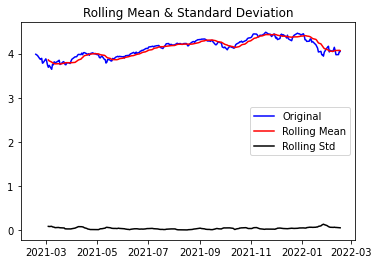

Results of Dickey-Fuller Test:
Test Statistic                  -1.525992
p-value                          0.520616
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.255688
p-value                          0.000007
#Lags Used                      14.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


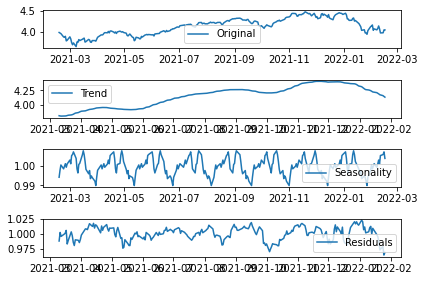

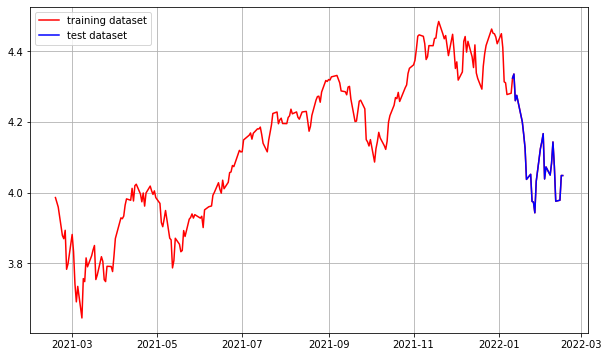

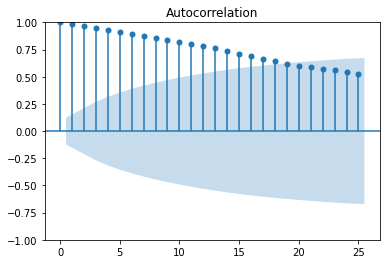

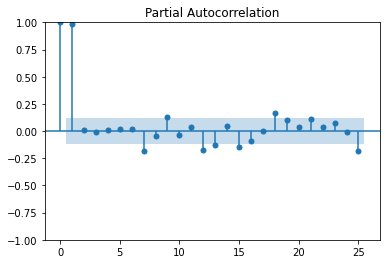

Results of Dickey-Fuller Test:
Test Statistic                -1.614895e+01
p-value                        4.591278e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.902518e+00
p-value                        4.148631e-12
#Lags Used                     1.300000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 440.087
Date:                Thu, 17 Feb 2022   AIC                           -872.174
Time:                        14:35:12   BIC                           -858.492
Sample:                             0   HQIC                          -866.652
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0531      0.067     -0.791      0.429      -0.185       0.078
ar.L2         -0.0371      0.048     -0.766      0.444      -0.132       0.058
ma.L1         -0.9949      0.068    -14.644      0.0

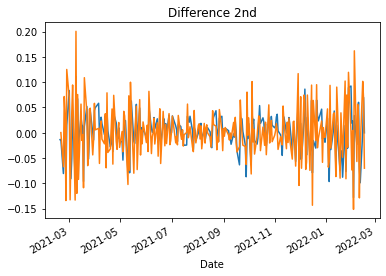

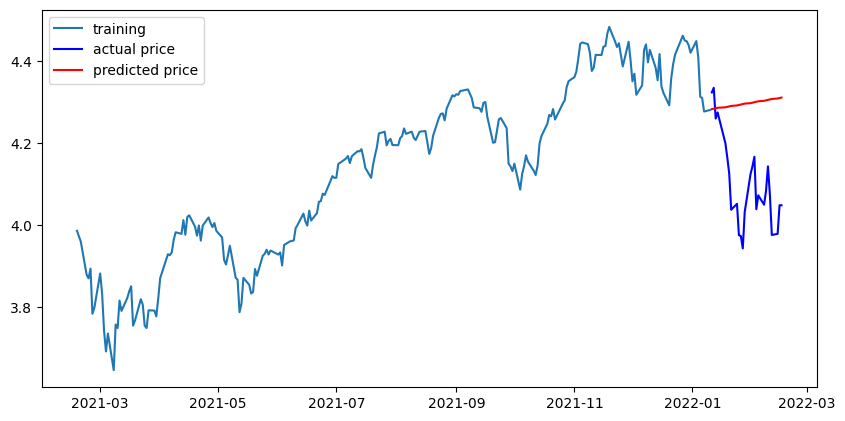

MSE:  212.1483297753308
MAE:  13.223916994125709
RMSE:  14.565312553300421
MAPE: 23.03%
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-712.528, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-777.491, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-714.527, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-807.104, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-828.661, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-864.085, Time=0.65 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-869.265, Time=0.31 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-866.361, Time=0.77 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]

ARIMA(order=(2, 2, 1), scoring_args={}, suppress_warnings=True)

In [14]:
# CASE 2 : ÎØ∏Íµ≠ 3Î∞∞ Î†àÎ≤ÑÎ¶¨ÏßÄ ETF - TQQQ

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TQQQ.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()


def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('Ïäù=3')


from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÑúÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('Ïäù=3')


# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 

# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)


# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)


train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()


# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)


from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 2, 1))  # order = (p, d, q) 
fitted_m = model.fit() 

print(fitted_m.summary())


# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

###########################
# Ïò§ÌÜ† ÏïÑÎ¶¨Îßà
import FinanceDataReader as fdr
from pmdarima.arima import ndiffs
import pmdarima as pm

# train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ Î∞è test Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
model = pm.auto_arima(y = train_data        # Îç∞Ïù¥ÌÑ∞
                      , d = 2            # Ï∞®Î∂Ñ Ï∞®Ïàò, ndiffs Í≤∞Í≥º!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # Í≥ÑÏ†àÏÑ± ARIMAÍ∞Ä ÏïÑÎãàÎùºÎ©¥ ÌïÑÏàò!
                      , stepwise = True
                      , trace=True
                      )

model = pm.auto_arima (train_data, d = 2, seasonal = False, trace = True)
model.fit(train_data)
########################################

* p=2, d=0, q=1 -> MAPE: 19.11%
* p=2, d=1, q=0 -> MAPE: 21.12%
* p=2, d=1, q=1 -> MAPE: 21.17%
* p=1, d=2, q=0 -> MAPE: 8.14%
* p=1, d=2, q=1 -> MAPE: 23.20%
* p=0, d=2, q=1 -> MAPE: 23.21%
* p=1, d=0, q=2 -> MAPE: 18.34%
* p=0, d=1, q=2 -> MAPE: 21.15%
* p=1, d=1, q=2 -> MAPE: 21.04%

Ïäù=3
Ïäù=3


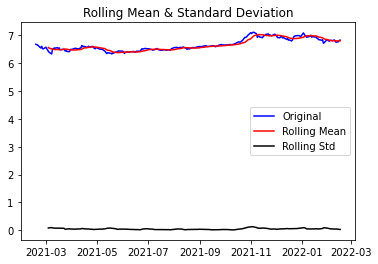

Results of Dickey-Fuller Test:
Test Statistic                  -1.253137
p-value                          0.650330
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.567501e+00
p-value                        8.089813e-09
#Lags Used                     7.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (1%)           -3.460992e+00
Critical Value (5%)           -2.875016e+00
Critical Value (10%)          -2.573952e+00
dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


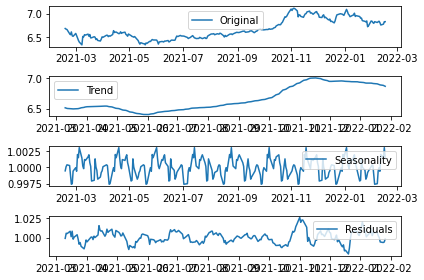

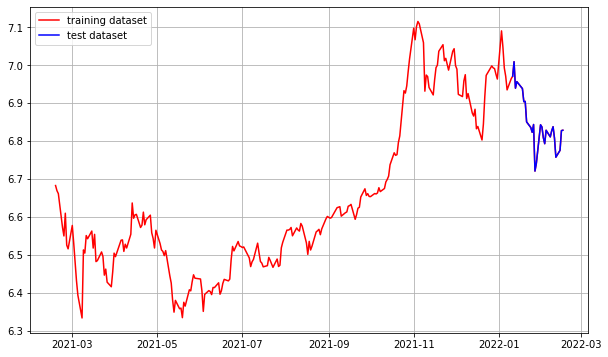

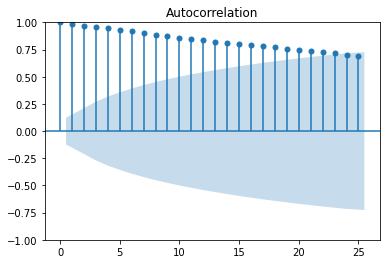

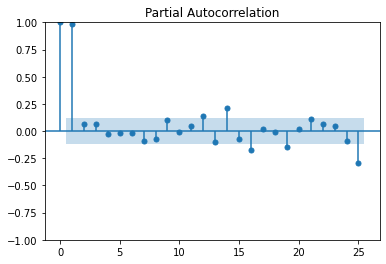

Results of Dickey-Fuller Test:
Test Statistic                -1.683248e+01
p-value                        1.155026e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.198159e+00
p-value                        2.404162e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(3, 2, 3)   Log Likelihood                 438.882
Date:                Thu, 17 Feb 2022   AIC                           -863.764
Time:                        14:34:17   BIC                           -839.820
Sample:                             0   HQIC                          -854.101
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2656      0.071     -3.758      0.000      -0.404      -0.127
ar.L2         -0.9064      0.051    -17.642      0.000      -1.007      -0.806
ar.L3          0.0089      0.072      0.124      0.9

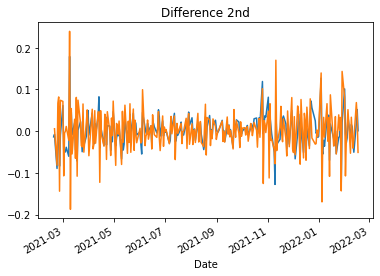

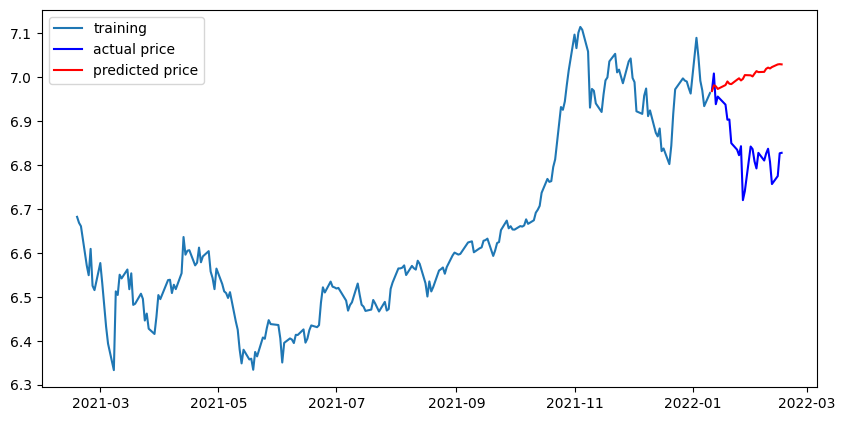

MSE:  31256.277580091213
MAE:  158.8283154022858
RMSE:  176.79445008283267
MAPE: 17.48%
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-700.784, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-773.937, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-702.781, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-805.622, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-812.161, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-853.395, Time=0.33 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-854.883, Time=0.52 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-858.155, Time=1.24 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=1.23 sec

Best model:  ARIMA(3,2,3)(0,0,0)[0]

ARIMA(order=(3, 2, 3), scoring_args={}, suppress_warnings=True)

In [13]:
# CASE 3 : ÎØ∏Íµ≠ 3Î∞∞ Î†àÎ≤ÑÎ¶¨ÏßÄ ETF - LABU

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TSLA.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()


def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('Ïäù=3')


from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÑúÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('Ïäù=3')


# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 

# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)


# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)


train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()


# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)


from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(3, 2, 3))  # order = (p, d, q) 
fitted_m = model.fit() 

print(fitted_m.summary())


# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

###########################
# Ïò§ÌÜ† ÏïÑÎ¶¨Îßà
import FinanceDataReader as fdr
from pmdarima.arima import ndiffs
import pmdarima as pm

# train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ Î∞è test Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
model = pm.auto_arima(y = train_data        # Îç∞Ïù¥ÌÑ∞
                      , d = 2            # Ï∞®Î∂Ñ Ï∞®Ïàò, ndiffs Í≤∞Í≥º!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # Í≥ÑÏ†àÏÑ± ARIMAÍ∞Ä ÏïÑÎãàÎùºÎ©¥ ÌïÑÏàò!
                      , stepwise = True
                      , trace=True
                      )

model = pm.auto_arima (train_data, d = 2, seasonal = False, trace = True)
model.fit(train_data)
########################################

* p=2, d=0, q=1 -> MAPE: 8.52%
* p=2, d=1, q=0 -> MAPE: 13.00%
* p=2, d=1, q=1 -> MAPE: 12.99%
* p=1, d=2, q=0 -> MAPE: 23.61%
* p=1, d=2, q=1 -> MAPE: 16.34%
* p=0, d=2, q=1 -> MAPE: 16.00%
* p=1, d=0, q=2 -> MAPE: 8.56%
* p=0, d=1, q=2 -> MAPE: 13.00%
* p=1, d=1, q=2 -> MAPE: 13.00%


# üìï ÌöåÍ≥†  + AutoARIMA

* Ìï¥Îãπ ÎÖ∏ÎìúÎäî p, d, qÎ•º Ï°∞Ï†àÌï¥ÏÑú MAPE Í∞íÏùÑ ÎÇÆÏ∂îÎäî Í≤ÉÏù¥ Î™©Ï†Å<br>
    ‚Üí Í∞Å CASEÏùò Í∞ÄÏû• ÎÇÆÏùÄ MAPE Í∞íÏùÑ ÌôïÏù∏<br>
    (ÏòàÏ∏°Ïò§Ï∞®Í∞Ä Í∞ÄÏû• ÏûëÏùÄ Í∞íÏùÑ Ï∞æÎäî Í≥ºÏ†ï)
<br><br>
* MSEÏôÄ MAPEÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî ÏÑ±Îä•ÏßÄÌëú.
    MSEÏùò Î≤îÏúÑÎäî 0~Î¨¥ÌïúÎåÄ(infinity)Ïùò Í∞íÏùÑ Í∞ÄÏßÑÎã§.
    MSEÍ∞Ä 100Ïù¥Îã§ ÌñàÏùÑ Îïå Ïù¥ Î™®ÌòïÏù¥ Ï¢ãÏùÄÏßÄ ÌåêÎã®ÌïòÍ∏∞Í∞Ä Ïñ¥Î†§ÏõÄ Í∑∏ÎûòÏÑú MAPEÏùò ÌçºÏÑºÌä∏ Í∞íÏùÑ ÌÜµÌï¥ ÏÑ±Îä•ÌèâÍ∞Ä.
    MAPEÏùÄ ÌçºÏÑºÌä∏ Í∞íÏùÑ Í∞ÄÏßÄÎ©∞ 0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÌöåÍ∑Ä Î™®ÌòïÏùò ÏÑ±Îä•Ïù¥ Ï¢ãÎã§Í≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÏùå.
<br><br>
* AR -> MA -> ARMA -> ARIMA ÏàúÏÑúÎåÄÎ°ú Í∏∞Î≤ïÏù¥ Î∞úÏ†Ñ<br>
    ARIMA = AR + I + MA
<br><br>
* p : ÏûêÍ∏∞ÌöåÍ∑Ä Î™®Ìòï(AR)Ïùò ÏãúÏ∞®<br>
    d : Ï∞®Î∂Ñ ÎàÑÏ†Å(I) ÌöüÏàò<br>
    q : Ïù¥ÎèôÌèâÍ∑† Î™®Ìòï(MA)Ïùò ÏãúÏ∞®
<br><br>
* ÎÖ∏ÎìúÏóêÏÑú Ï†úÏãúÌïú Í∏∞Ï§ÄÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.<br>
    p+q < 2 , p * q = 0<br>
    Í∑∏Îü¨ÎÇò p * q = 1Ïù¥ ÎêòÏóàÏùÑ Îïå MAPEÍ∞íÏù¥ ÎÇÆÍ≤å ÎÇòÏò§Îäî Í≤ΩÏö∞ÎèÑ ÏûàÏóàÏùå.
<br><br>
* Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞Ïùò Í≤ΩÏö∞Ïùò ÏàòÍ∞Ä ÎßéÏïÑÏ°åÏùÑ Îïå, ÏùºÏùºÏù¥ ÏßÅÏ†ë Î∞îÍøîÏïº ÌïòÎäî ÏàòÍ≥†Î°úÏõÄÏùÑ ÎçúÍ≥† Ïã∂ÏóàÎã§.<br>
Îòê ÎÖ∏ÎìúÏóêÏÑú Ï†úÏãúÌïú Í∏∞Ï§ÄÍ≥ºÎäî Îã§Î•∏ Ï°∞Í±¥ÏóêÏÑú MAPEÍ∞íÏù¥ ÎÇÆÍ≤å ÎÇòÏò§Îäî Í≤ΩÏö∞ÎèÑ ÏûàÏóàÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ÄÎä•ÌïòÎ©¥ Îã§Î•∏ Ï°∞Í±¥ÎèÑ Ìï®Íªò Í≤ÄÌÜ†ÌïòÍ≥† Ïã∂ÏóàÎã§.<br>
Îëê Í∞ÄÏßÄ Î™®ÎëêÎ•º Ìï¥Í≤∞Ìï† Î∞©Î≤ïÏùÑ Ï∞æÎã§Í∞Ä Ïò§ÌÜ†ÏïÑÎ¶¨ÎßàÎ•º ÏïåÍ≤å ÎêòÏóàÎã§.
<br><br><br>
### auto arima<br>
    : d(Ï∞®Ïõê)ÏùÑ ÏßÄÏ†ïÌïòÎ©¥ ÏµúÏ†ÅÏùò MAPEÍ∞Ä ÎÇòÏò§Îäî ÌååÎùºÎØ∏ÌÑ∞ Í∞íÏùÑ ÏûêÎèôÏúºÎ°ú Ï∞æÏïÑÏ§ÄÎã§.<br>

**Ï∞∏Í≥†**<br>
https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/<br>

**Í≤∞Í≥º**<br>
Ïò§ÌÜ†ÏïÑÎ¶¨ÎßàÏóêÏÑú d(Ï∞®Ïõê)Í∞íÏùò Í∏∞Î≥∏Í∞íÏùÄ NoneÏù¥Îã§.<br>
dÏóê Ï†ïÏàò nÏùÑ ÎÑ£Ïñ¥Ï£ºÎ©¥ nÍπåÏßÄÏùò Î™®Îì† Í≤ΩÏö∞Ïùò ÏàòÏóêÏÑú ÏµúÏ†ÅÏ°∞Ìï©ÏùÑ Í≥ÑÏÇ∞Ìï¥ Î≥¥Ïó¨Ï§ÄÎã§<br>
Ïà´ÏûêÍ∞Ä Ïª§ÏßàÏàòÎ°ù Ïã§ÌñâÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÎã§.<br>
<br>
Ïò§ÌÜ†ÏïÑÎ¶¨ÎßàÎäî Í∞Å CASEÏóêÏÑú Îã§ÏùåÍ≥º Í∞ôÏùÄ Í∞íÏùÑ Î≥¥Ïó¨Ï§¨Îã§.<br>

<img width="300" alt="autoarima" src="https://user-images.githubusercontent.com/96965899/154502304-0cf9f3f8-0d35-480e-9f5e-cd7475513772.png">
    
<br>
Ïò§ÌÜ†ÏïÑÎ¶¨ÎßàÍ∞Ä ÏïåÎ†§Ï§Ä Ï°∞Ìï©ÏùÑ ÎÑ£Ïñ¥ ÏΩîÎìúÎ•º Ïã§ÌñâÏãúÏº∞Îã§.<br>
Í∞Å CASEÏùò Í∞ÄÏû• ÎÇÆÏùÄ MAPEÏùò Í∞íÏùÄ Ïò§ÌÜ†ÏïÑÎ¶¨ÎßàÍ∞Ä ÏïåÎ†§Ï§Ä Í∞íÏûÑÏùÑ Í∏∞ÎåÄÌñàÏúºÎÇò, CASE 1Í≥º CASE 3Ïùò Í≤ΩÏö∞ÏóêÎäî 17.48%, CASE 2Ïùò Í≤ΩÏö∞Îäî  23.03%Î°ú Îã§Î•∏ Í≤ΩÏö∞Ïùò Ïàò Î≥¥Îã§ ÎÜíÏùÄ ÏàòÏπòÍ∞Ä ÎÇòÏôîÎã§.<br>
Ïôú Ïò§ÌÜ†ÏïÑÎ¶¨ÎßàÍ∞Ä ÌäπÏ†ï Ï°∞Ìï©ÏùÑ ÎΩëÏïÑÎÉàÎäîÏßÄ, Ïñ¥Ïß∏ÏÑú Í∑∏ Ï°∞Ìï©Ïù¥ ÏµúÏ†ÅÏùò Í∞íÏù¥ ÏïÑÎãàÏóàÎäîÏßÄÎäî Ï∂îÌõÑ Îçî ÏïåÏïÑÎ¥êÏïº Ìï† Í≤É Í∞ôÎã§.<br>
Ïù¥ Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú Ïò§ÌÜ†ÏïÑÎ¶¨ÎßàÏôÄ Í∞ôÏù¥ ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©ÎêòÎäî Î™®Îç∏ÎèÑ Ïã†Î¢∞ÏÑ±ÏùÑ Î∞òÎìúÏãú Í≤ÄÏ¶ùÌï¥Ïïº ÌïúÎã§Îäî Í≤ÉÏùÑ ÏÉùÍ∞ÅÌï¥Î≥¥Í≤å ÎêòÏóàÎã§.<br>


Ï∂îÏ†ïÎêú Ï∞®Ïàò d = 1
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5114.500, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5089.241, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5071.627, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5112.511, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=5042.956, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=5044.199, Time=0.34 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5048.906, Time=0.46 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5077.561, Time=0.08 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=5051.846, Time=0.77 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0] intercept
Total fit time: 2.873 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4942.230, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercep

'\n# Step 3. ÏûîÏ∞® Í≤ÄÏ†ï\n# ÏûîÏ∞®Í∞Ä Î∞±ÏÉâÏû°Ïùå Í≥ºÏ†ïÏù∏ÏßÄ (=Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäîÏßÄ), Ï†ïÍ∑úÏÑ± Î∞è Îì±Î∂ÑÏÇ∞ÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäîÏßÄ ÌååÏïÖ\n\nprint(model.summary())\n\nmodel.plot_diagnostics(figsize=(16, 8))\nplt.show()\n\n\n\n\n# Step 4. Î™®Ìòï refresh Î∞è ÏòàÏ∏°\n# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°\n\n# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎßåÌÅº ÏòàÏ∏°\ny_predict = model.predict(n_periods=len(y_test)) \ny_predict = pd.DataFrame(y_predict,index = y_test.index,columns=[\'Prediction\'])\n\n# Í∑∏ÎûòÌîÑ\nfig, axes = plt.subplots(1, 1, figsize=(12, 4))\nplt.plot(y_train, label=\'Train\')        # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞\nplt.plot(y_test, label=\'Test\')          # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞\nplt.plot(y_predict, label=\'Prediction\')  # ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞\nplt.legend()\nplt.show()\n\n\n\ndef forecast_one_step():\n    fc, conf_int = model.predict(n_periods=1 # Ìïú Ïä§ÌÖùÏî©!\n        , return_conf_int=True)              # Ïã†Î¢∞Íµ¨Í∞Ñ Ï∂úÎ†•\n    return (\n        fc.tolist()[0],\n        np.asarray(conf_int).t

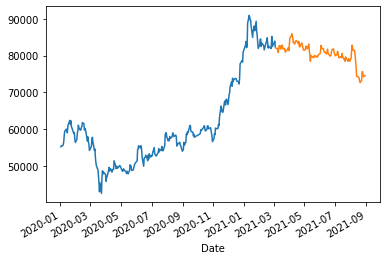

In [3]:
"""
# Ïò§ÌÜ† ÏïÑÎ¶¨Îßà Ï†ÑÏ≤¥ÏΩîÎìú

# !pip install finance-datareader
# !pip install -U finance-datareader # ÏóÖÎç∞Ïù¥Ìä∏

import FinanceDataReader as fdr
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm




# ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞ÄÎ°ú ARIMA ÏµúÏ†Å Î™®Îç∏ Ï∞æÍ∏∞
# 20ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 21ÎÖÑ 8Ïõî 30ÏùºÍπåÏßÄÏùò ÏùºÎ≥Ñ ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞
df_krx = fdr.StockListing('KRX') # ÌïúÍµ≠Í±∞ÎûòÏÜå ÏÉÅÏû•Ï¢ÖÎ™© Ï†ÑÏ≤¥
ticker = df_krx[df_krx.Name=='ÏÇºÏÑ±Ï†ÑÏûê']['Symbol'] # Ìã∞Ïª§
ss = fdr.DataReader(''.join(ticker.values),'2020-01-01', '2021-08-30')



# Step 1. ÏãúÍ≥ÑÏó¥ ÏûêÎ£å ÏãúÍ∞ÅÌôî 
# 7:3Ïùò ÎπÑÏú®Î°ú trainÍ≥º test Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàÑÍ∏∞
y_train = ss['Close'][:int(0.7*len(ss))]
y_test = ss['Close'][int(0.7*len(ss)):]
y_train.plot()
y_test.plot()

# Ï†ïÎßê Ï∞®Î∂ÑÏù¥ ÌïÑÏöîÌïúÏßÄ, ÌïÑÏöîÌïòÎã§Î©¥ Î™á Ï∞® Ï∞®Î∂ÑÏù¥ ÏµúÏÑ†Ïù∏ÏßÄ ÌååÏïÖ
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Ï∂îÏ†ïÎêú Ï∞®Ïàò d = {n_diffs}")



# Step 2. ARIMA Î™®Ìòï Ï†ÅÌï©
# train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ Î∞è test Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
model = pm.auto_arima(y = y_train        # Îç∞Ïù¥ÌÑ∞
                      , d = 2            # Ï∞®Î∂Ñ Ï∞®Ïàò, ndiffs Í≤∞Í≥º!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # Í≥ÑÏ†àÏÑ± ARIMAÍ∞Ä ÏïÑÎãàÎùºÎ©¥ ÌïÑÏàò!
                      , stepwise = True
                      , trace=True
                      )


model = pm.auto_arima (y_train, d = 1, seasonal = False, trace = True)
model.fit(y_train)
"""



"""
# Step 3. ÏûîÏ∞® Í≤ÄÏ†ï
# ÏûîÏ∞®Í∞Ä Î∞±ÏÉâÏû°Ïùå Í≥ºÏ†ïÏù∏ÏßÄ (=Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäîÏßÄ), Ï†ïÍ∑úÏÑ± Î∞è Îì±Î∂ÑÏÇ∞ÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäîÏßÄ ÌååÏïÖ

print(model.summary())

model.plot_diagnostics(figsize=(16, 8))
plt.show()




# Step 4. Î™®Ìòï refresh Î∞è ÏòàÏ∏°
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎßåÌÅº ÏòàÏ∏°
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# Í∑∏ÎûòÌîÑ
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞
plt.plot(y_test, label='Test')          # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞
plt.plot(y_predict, label='Prediction')  # ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞
plt.legend()
plt.show()



def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # Ìïú Ïä§ÌÖùÏî©!
        , return_conf_int=True)              # Ïã†Î¢∞Íµ¨Í∞Ñ Ï∂úÎ†•
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )


forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## Î™®Ìòï ÏóÖÎç∞Ïù¥Ìä∏ !!
    model.update(new_ob)
    

pd.DataFrame({"test": y_test, "pred": y_pred})

print(model.summary())



from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # ÏòàÏ∏°Í∞í-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # Ïã†Î¢∞ Íµ¨Í∞Ñ---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## ÏÉÅÏúÑ Ïã†Î¢∞ Íµ¨Í∞Ñ -> ÌïòÏúÑ Ïã†Î¢∞ Íµ¨Í∞Ñ Ïó≠ÏàúÏúºÎ°ú
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(0,1,0)Î™®Ìòï")
fig.show()





# Step 5. Î™®Ìòï ÌèâÍ∞Ä
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")
# MAPE: 0.792

"""